In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


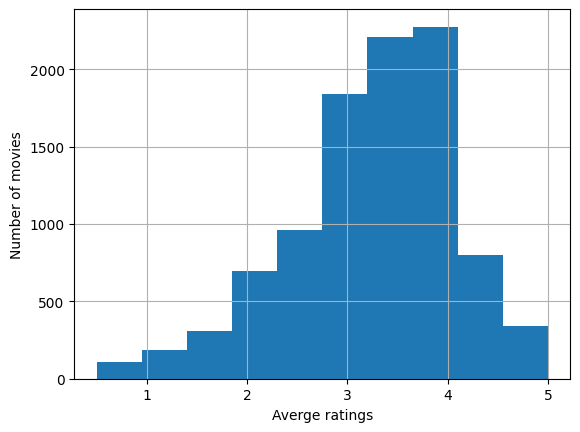

In [8]:
import matplotlib.pyplot as plt

plt.figure()
ratings.groupby('movieId').mean()['rating'].hist()

plt.xlabel('Averge ratings')
plt.ylabel('Number of movies')
plt.show()

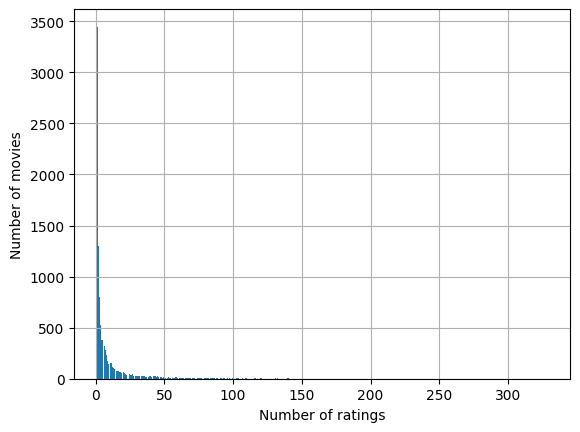

In [9]:
plt.figure()
ratings.groupby('movieId').count()['rating'].hist(bins=400)

plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

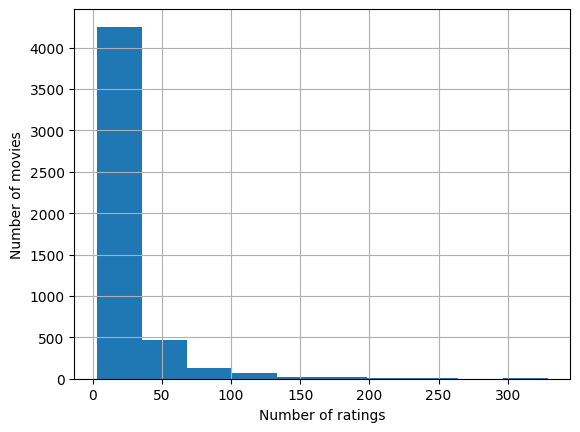

In [10]:
plt.figure()

filtered = ratings.groupby('movieId').filter(lambda c: len(c) >= 3)
filtered.groupby('movieId').count()['rating'].hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

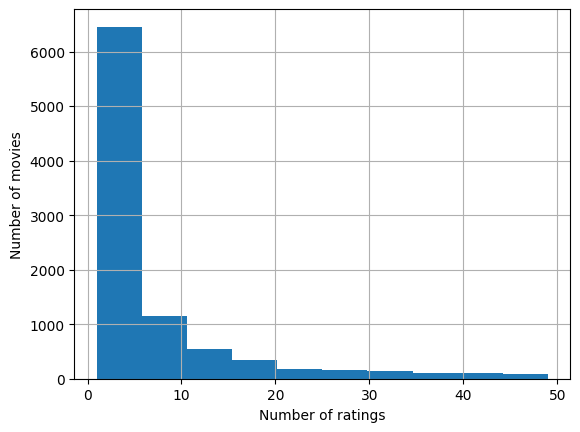

In [11]:
plt.figure()
filterd = ratings.groupby('movieId').count()['rating']
filterd = filterd[filterd < 50]
filterd.hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

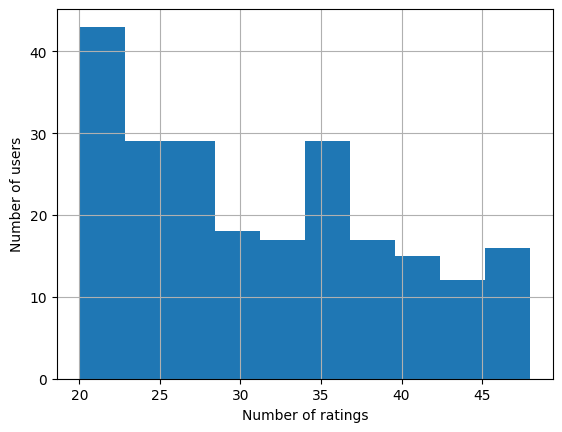

In [12]:
plt.figure()
filterd = ratings.groupby('userId').count()['rating']
filterd = filterd[filterd < 50]
filterd.hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

In [13]:
filtered = ratings.groupby('movieId').filter(lambda c: len(c) >= 10)
print(filtered.shape)
filtered.groupby('movieId').count().sort_values('rating', ascending=False)

(81116, 4)


,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
...,...,...,...
5329,10,10,10
5296,10,10,10
68793,10,10,10


In [14]:
def get_year(title):
    title = title.strip()
    if(title[-6] != '('):
        return None
    return title[-5:-1]

movies['year'] = movies.title.apply(get_year)

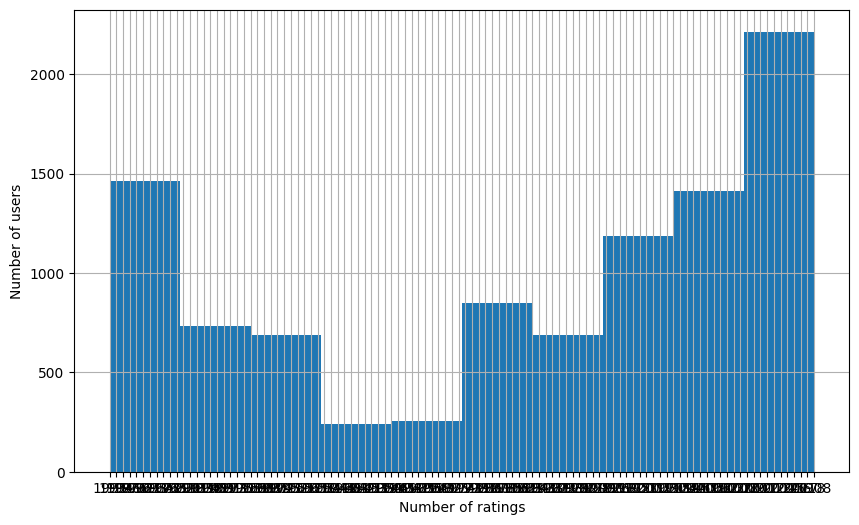

In [15]:
plt.figure(figsize=(10, 6))
movies['year'].hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

<AxesSubplot: >

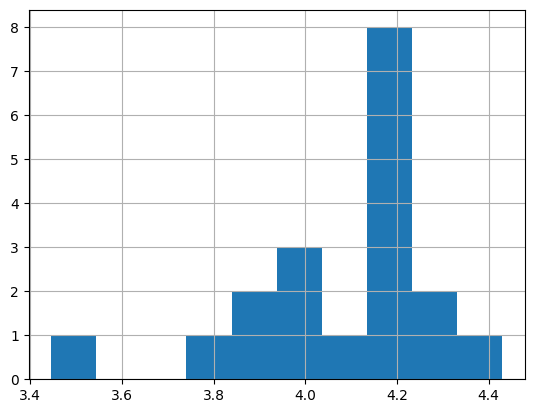

In [16]:
many_ratings = filtered.groupby('movieId').filter(lambda c: len(c) >= 200)
many_ratings.groupby('movieId').mean()['rating'].hist()

In [17]:
def x(c):
    print(c)
    
g = ratings.groupby(['rating', 'userId']).agg({'rating': 'count'})
g.groupby('userId').filter(lambda x: len(x) <= 2).sort_values('userId')

,,rating
rating,userId,
4.0,49,10
4.5,49,11
5.0,53,20
3.0,404,36
4.0,404,24
3.0,609,27
4.0,609,10


In [45]:
print(movies[movies.title.duplicated(keep=False)])
duplicates = movies[movies.title.duplicated(keep='first')]
duplicates

      movieId                                   title  \
650       838                             Emma (1996)   
2141     2851                         Saturn 3 (1980)   
4169     6003  Confessions of a Dangerous Mind (2002)   
5601    26958                             Emma (1996)   
5854    32600                             Eros (2004)   
5931    34048                War of the Worlds (2005)   
6932    64997                War of the Worlds (2005)   
9106   144606  Confessions of a Dangerous Mind (2002)   
9135   147002                             Eros (2004)   
9468   168358                         Saturn 3 (1980)   

                                   genres  year  
650                  Comedy|Drama|Romance  1996  
2141            Adventure|Sci-Fi|Thriller  1980  
4169          Comedy|Crime|Drama|Thriller  2002  
5601                              Romance  1996  
5854                                Drama  2004  
5931     Action|Adventure|Sci-Fi|Thriller  2005  
6932                  

,movieId,title,genres,year
5601,26958,Emma (1996),Romance,1996
6932,64997,War of the Worlds (2005),Action|Sci-Fi,2005
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,2002
9135,147002,Eros (2004),Drama|Romance,2004
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller,1980


In [202]:
ratings_clean = ratings.copy(deep=True)
movies_clean = movies.copy(deep=True)

for i, row in duplicates.iterrows():
    other_movie = movies[(movies['title'] == row['title']) & (movies['movieId'] != row['movieId'])].iloc[0]
    ratings_clean[ratings_clean['movieId'] == other_movie['movieId']]['movieId'] = row['movieId']
    print(f'Updated {other_movie["movieId"]} to {row["movieId"]}')
    movies_clean = movies_clean[movies_clean['movieId'] != other_movie["movieId"]]

Updated 838 to 26958
Updated 34048 to 64997
Updated 6003 to 144606
Updated 32600 to 147002
Updated 2851 to 168358


/tmp/ipykernel_7561/2852283505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_clean[ratings_clean['movieId'] == other_movie['movieId']]['movieId'] = row['movieId']


In [166]:
ratings[ratings_clean.duplicated(keep=False, subset=['movieId', 'userId'])]
#dup[dup['userId'] == 12]
#dup.sort_values(by=['userId','movieId'])

,userId,movieId,rating,timestamp


<IPython.core.display.Javascript object>


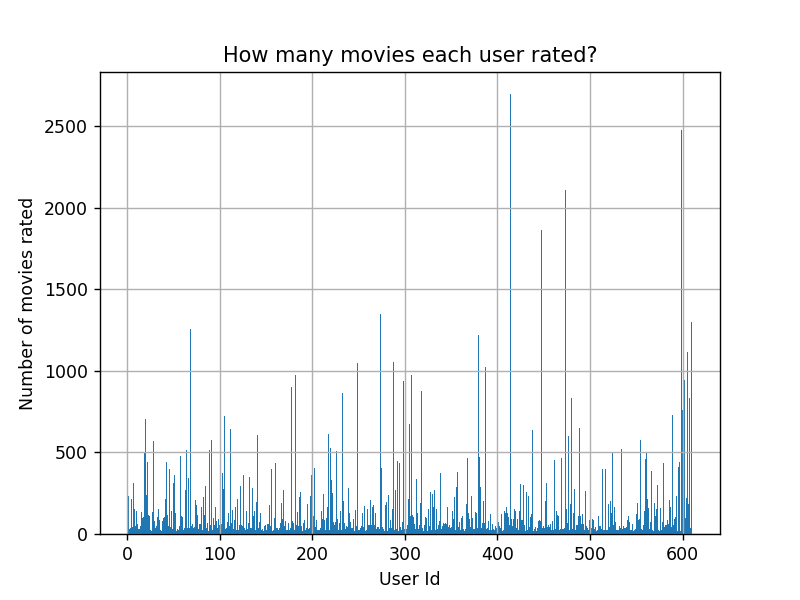

Text(0.5, 1.0, 'How many movies each user rated?')

In [183]:
import matplotlib.pyplot as plt

%matplotlib notebook

ratings_clean['userId'].hist(bins=610)
plt.xlabel('User Id')
plt.ylabel('Number of movies rated')
plt.title('How many movies each user rated?')
#help(ratings_clean['userId'].hist)

<IPython.core.display.Javascript object>


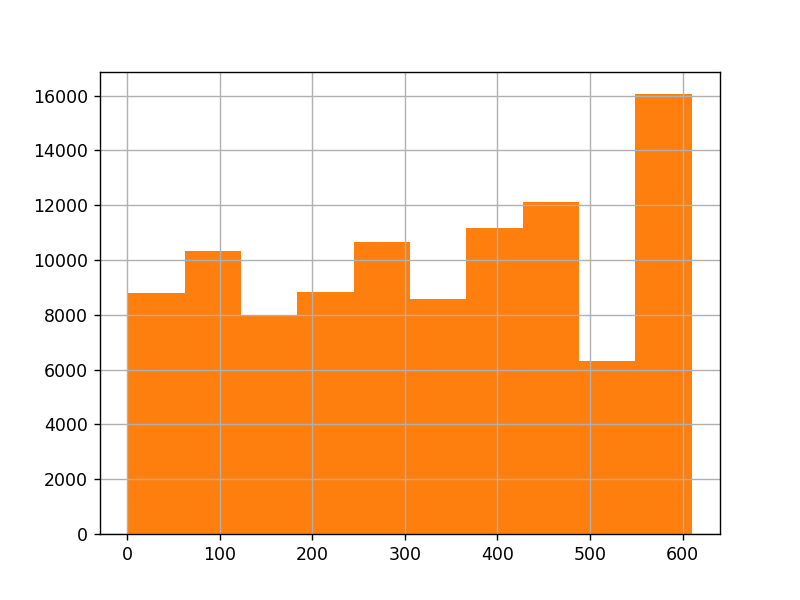

<AxesSubplot: >

In [167]:
#%matplotlib notebook 
ratings_clean['userId'][ratings_clean['userId'] < 25000].hist()

<AxesSubplot: >

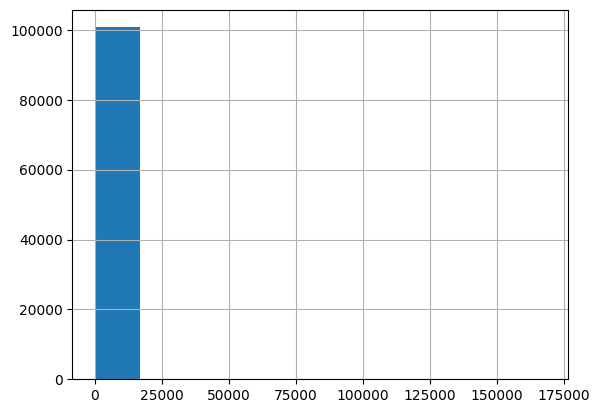

In [68]:
ratings_clean['userId'].hist()

<AxesSubplot: >

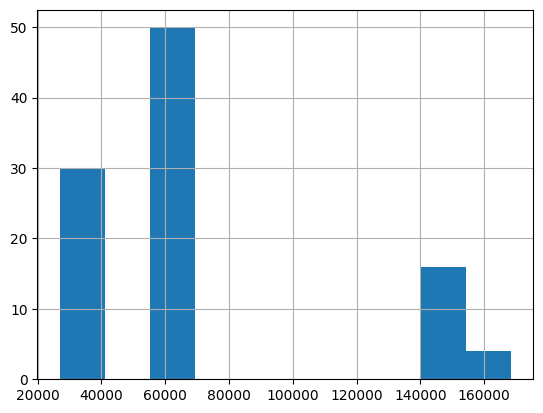

In [67]:
ratings_clean['userId'][ratings_clean['userId'] >= 25000].hist()

In [203]:
import matplotlib.pyplot as plt

#len(ratings_clean[ratings_clean['userId'] == 2])

ratings_count = ratings_clean.groupby('userId').count().sort_values(by='movieId', ascending=False).reset_index()
#plt.scatter(ratings_count['userId'], ratings_count['movieId'])
#plt.show()
ratings_count#['movieId'].values

,userId,movieId,rating,timestamp
0,414,2698,2698,2698
1,599,2478,2478,2478
2,474,2108,2108,2108
3,448,1864,1864,1864
4,274,1346,1346,1346
...,...,...,...,...
605,442,20,20,20
606,569,20,20,20
607,320,20,20,20
608,576,20,20,20


In [185]:
ratings_count[ratings_count['movieId'] == 20]

,userId,movieId,rating,timestamp
596,595,20,20,20
597,189,20,20,20
598,207,20,20,20
599,194,20,20,20
600,147,20,20,20
601,257,20,20,20
602,406,20,20,20
603,431,20,20,20
604,278,20,20,20
605,442,20,20,20


In [204]:
#ratings_clean = ratings_clean[~ratings_clean['userId'].isin(ratings_count[ratings_count['movieId'] < 20]['userId'])]
print(len(ratings_clean))
ratings_clean = ratings_clean[~ratings_clean['userId'].isin(ratings_count[ratings_count['movieId'] > 1000]['userId'])]
print(len(ratings_clean))
ratings_clean

100836
82319


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
99529,609,892,3.0,847221080
99530,609,1056,3.0,847221080
99531,609,1059,3.0,847221054
99532,609,1150,4.0,847221054


In [206]:
#print(len(movies_clean))
#movies_clean = movies_clean[movies_clean['movieId'].isin(ratings_clean['movieId'])]
#print(len(movies_clean))
#movies_clean
ratings_clean['movieId']
movies_clean['movieId'].isin(ratings_clean['movieId'])
movies_clean[~movies_clean['movieId'].isin(ratings_clean['movieId'])]
ratings_clean[ratings_clean['movieId'] == 96]
ratings[ratings['movieId'] == 96]


print(len(movies_clean))
movies_clean = movies_clean[movies_clean['movieId'].isin(ratings_clean['movieId'])]
print(len(movies_clean))
movies_clean


9737
8005


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [207]:
movies_clean.to_csv('movies_clean.csv')
ratings_clean.to_csv('ratings_clean.csv')